In [1]:
#importing librarys from sklearn,pandas,imblearn and xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn librarys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#pands,imblearn,xgboost librarys
from pandas.api.types import is_string_dtype
from imblearn.over_sampling import SMOTE
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")
#pd.set option is use to maximum rows and columns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## Read the train data

In [2]:
train= pd.read_csv("train_LZV4RXX.csv")
train.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [3]:
train.shape

(7000, 10)

In [4]:
#checking data type of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


#  checking for null values

In [5]:
train.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [6]:
Null_values_percentage=(train.isnull().sum().sum()/len(train))*100
Null_values_percentage

3.5000000000000004

In [7]:
#computing null values of catogoric features with mode
train['education'].fillna(train['education'].mode()[0], inplace=True)

In [8]:
train.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [9]:
train_categoric = train.select_dtypes(include = object)
train_categoric.columns

Index(['proof_submitted'], dtype='object')

In [10]:
train_numeric = train.select_dtypes(include=np.number)
train_numeric.columns

Index(['loan_id', 'age', 'education', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

In [11]:
#removing Unnecessary column from data set 
train=train.drop(['loan_id'],axis=1)

# finding co-relattoon

In [12]:
#checking co-realation of data
corr=train.corr()
corr

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
age,1.000000,0.058155,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,0.058155,1.000000,0.000562,0.089290,0.020395,-0.002614,0.023521,0.039905
loan_amount,-0.058011,0.000562,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.122741,0.089290,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,0.193026,0.020395,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,0.184503,-0.002614,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,0.050325,0.023521,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,-0.029571,0.039905,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


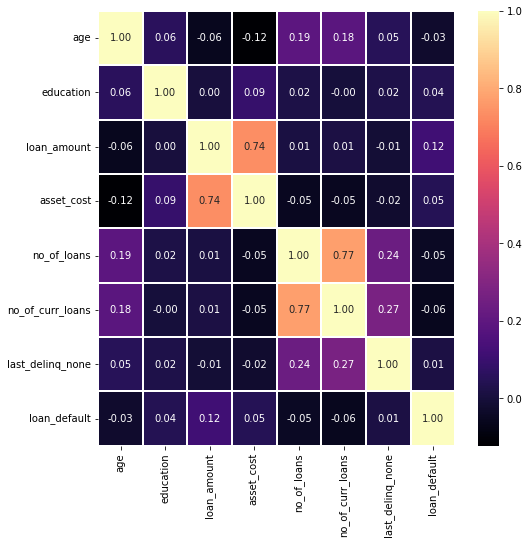

In [13]:
#  correlation matrix
plt.figure(figsize = (8, 8))
sns.heatmap(train.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Text(0.5, 1.0, 'loan_default')

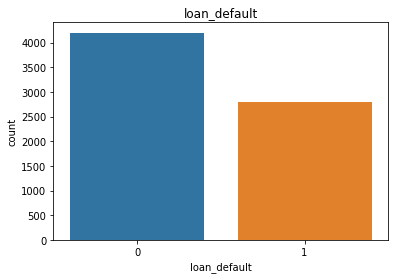

In [14]:
#ploting countplot to check distribution of data and numberof data present target column
sns.countplot(train['loan_default'])
plt.title('loan_default')

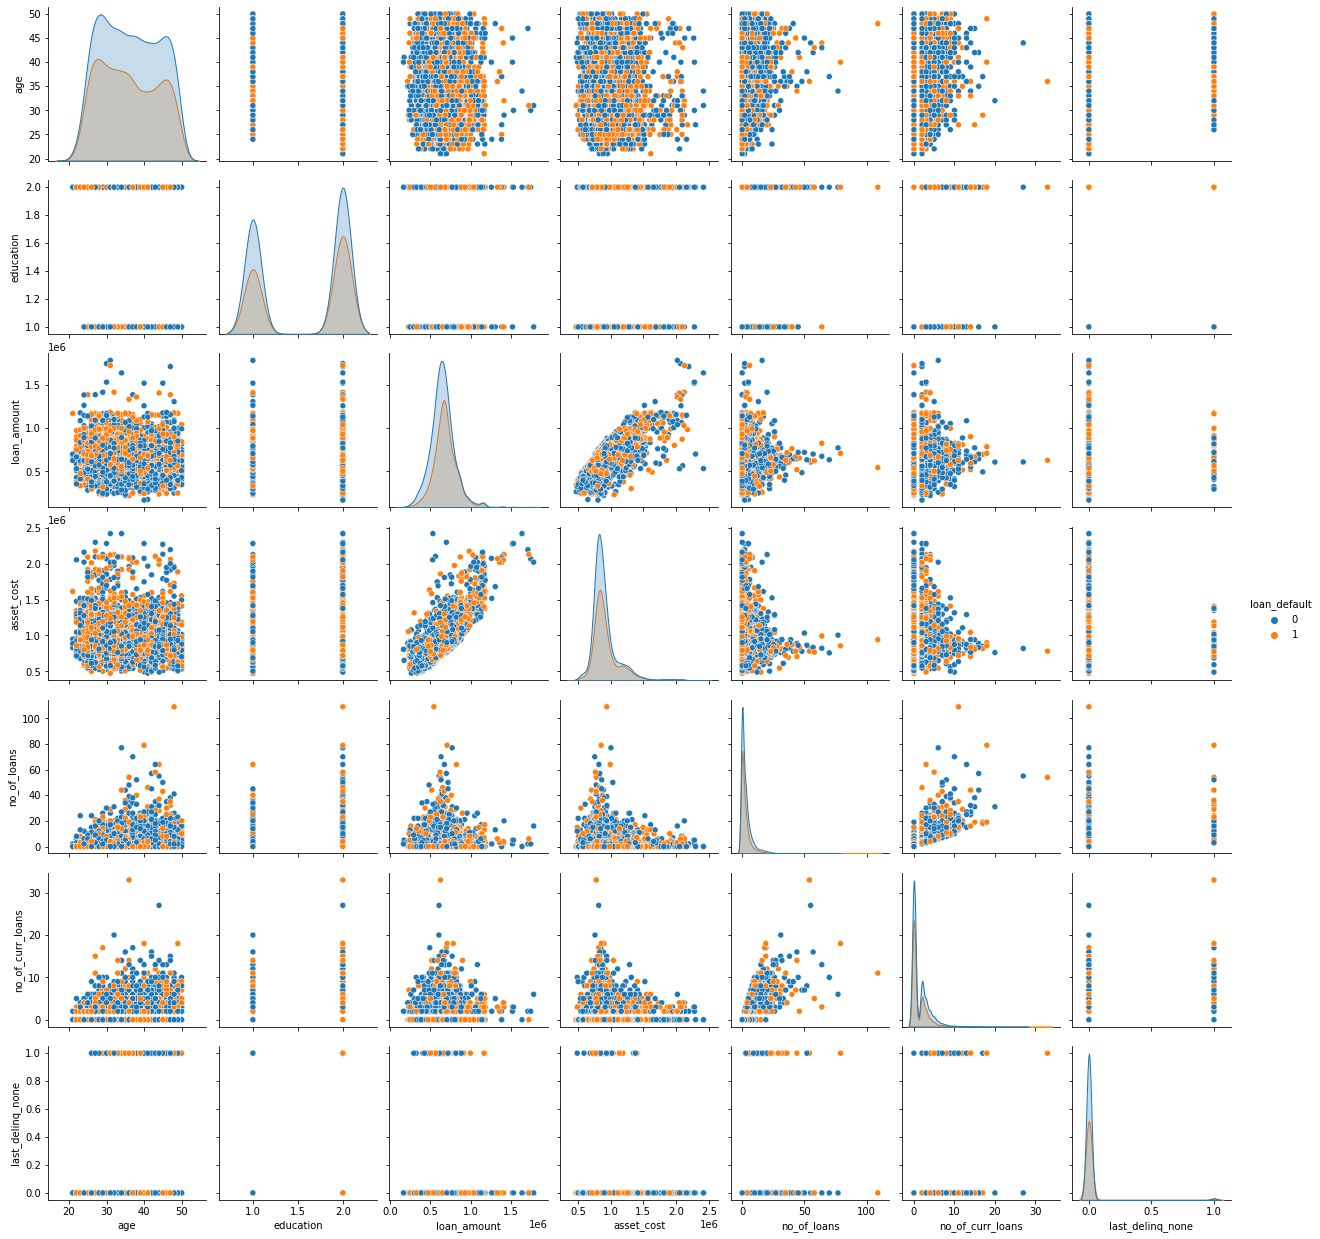

In [15]:
#  pair-plot for the data
sns.pairplot(train, hue = 'loan_default')
plt.show()

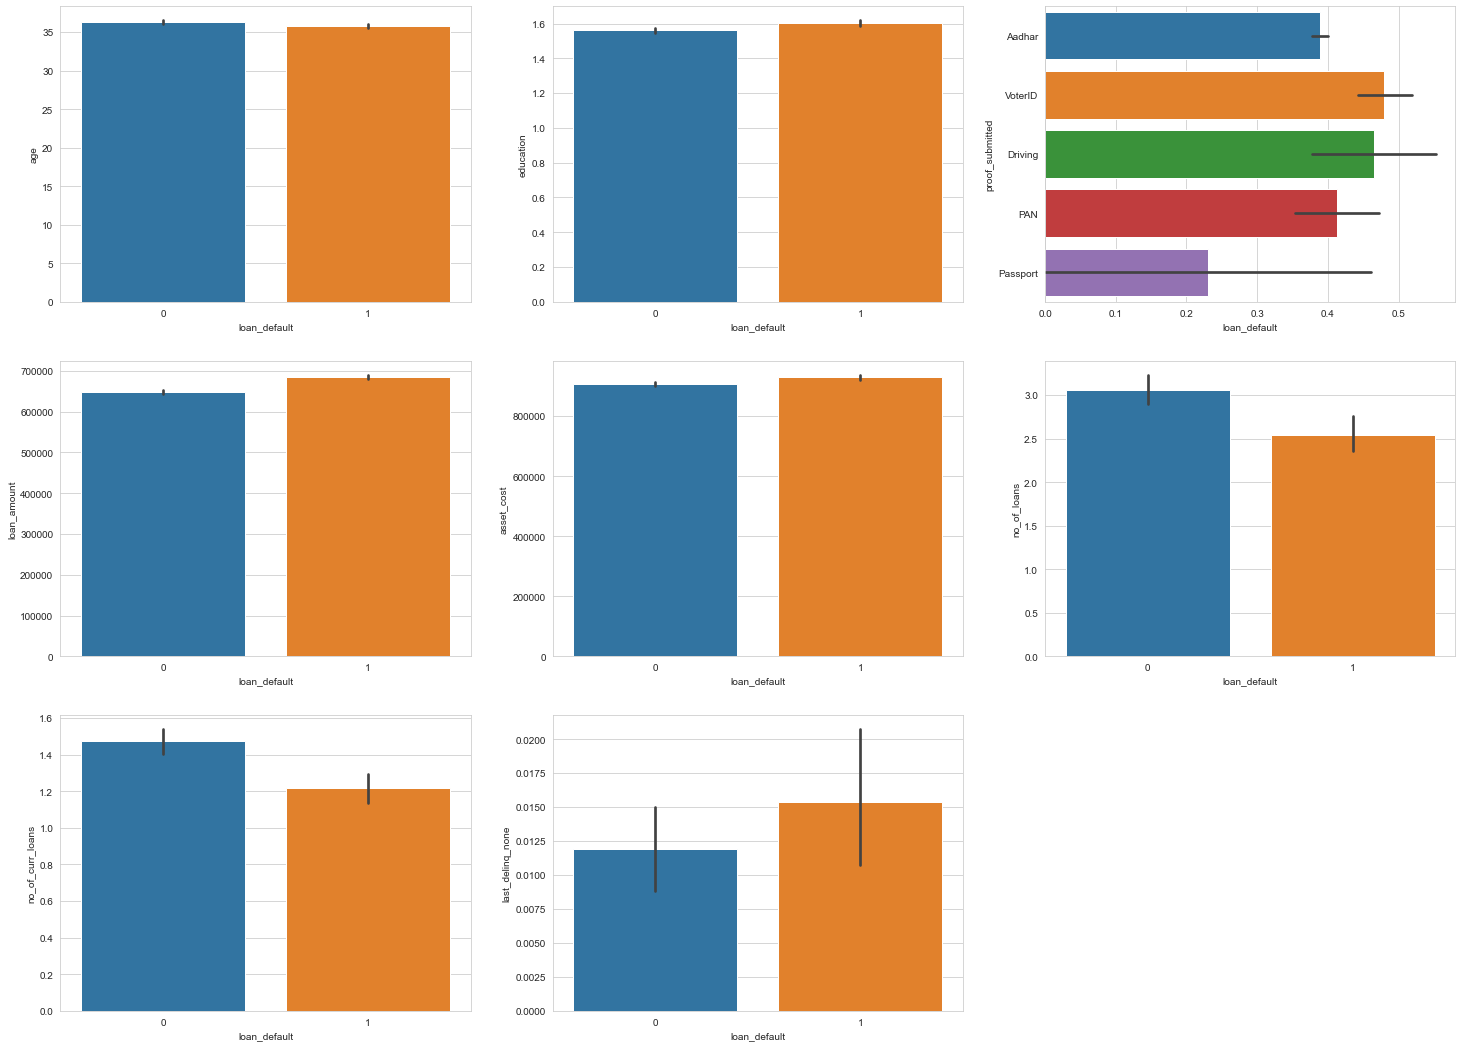

In [16]:
# Visualize whether any attributes are related to the target variable
sns.set_style("whitegrid")
fig = plt.figure(figsize = [25, 25])

# Plotting the independent variables with the target variable
cols = ['age', 'education', 'proof_submitted','loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.barplot(data = train, x = 'loan_default', y = col)
    count+=1
plt.show()  

<AxesSubplot:xlabel='education', ylabel='count'>

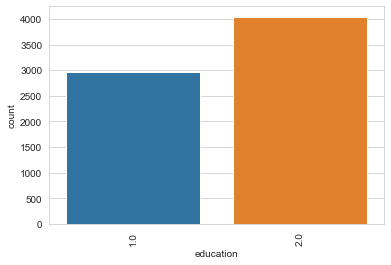

In [17]:
#checking  number of education using count plot
plt.xticks(rotation='vertical')
sns.countplot(train['education'])

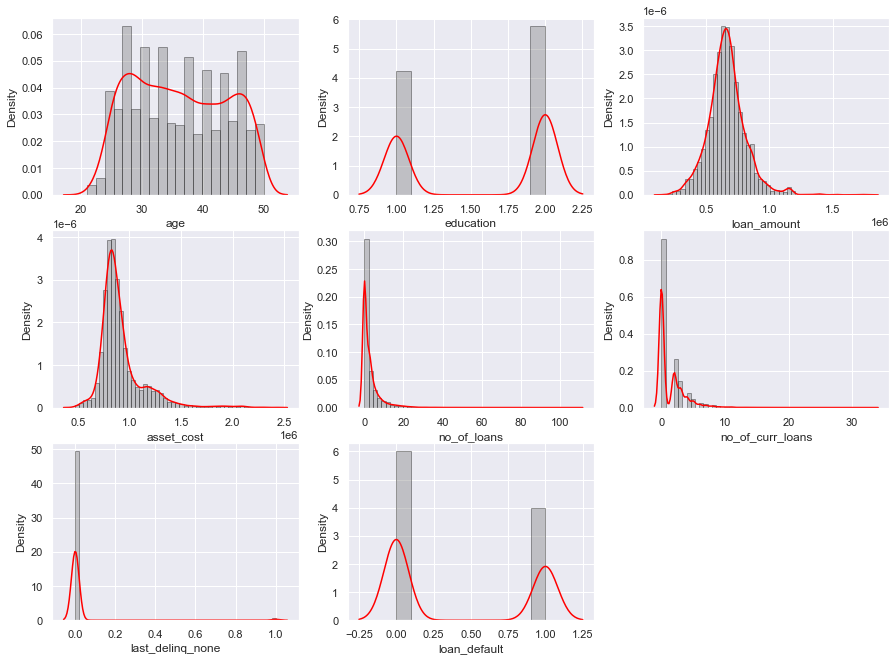

In [18]:
# distribution of the numerical columns
sns.set()
fig = plt.figure(figsize = [15, 15])
cols = ['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_default']
count = 1
for col in cols :
    plt.subplot(4,3,count)
    sns.distplot(train[col],hist_kws = dict(edgecolor = "k", linewidth = 1,color = 'grey'), color = 'red')
    count+=1
plt.show() 

In [19]:
#checking catagorical features
categoric = train.select_dtypes(include = object)
categoric.columns

Index(['proof_submitted'], dtype='object')

In [20]:
train_numeric = train.select_dtypes(include=np.number)
train_numeric.columns

Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

# encoding using dummy encoding

In [21]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encode = pd.get_dummies(categoric, drop_first = True)

In [22]:
#joining the dummy encoded values and numeric values for future moddel building
train_data_dummy = pd.concat([train_numeric, dummy_encode], axis=1)
train_data_dummy.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,27,1.0,504264,820920,2,2,0,0,0,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0,0,0,0
2,30,2.0,642936,826092,0,0,0,1,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0,0,0,0


# spliting data

In [23]:
#sepetaring target column(attrition) from dataset(spliting x and y)
X=train_data_dummy.drop(['loan_default'], axis = 1)
y=train_data_dummy[['loan_default']]

In [24]:
X.shape

(7000, 11)

In [25]:
y.shape

(7000, 1)

In [26]:
# Splitting Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (4900, 11)
The shape of X_test is: (2100, 11)
The shape of y_train is: (4900, 1)
The shape of y_test is: (2100, 1)


## model building

# logistic regression

In [27]:
# creating object for model
logisticRegr = LogisticRegression()
# Model Training
logisticRegr.fit(X_train, y_train)
# Making Predictions
y_pred_lr = logisticRegr.predict(X_test)
# Calculating Accuracy of the model
lr = round(accuracy_score(y_test, y_pred_lr)*100,2)
print(lr)

60.71


In [28]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[1275    0]
 [ 825    0]]


In [29]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1275
           1       0.00      0.00      0.00       825

    accuracy                           0.61      2100
   macro avg       0.30      0.50      0.38      2100
weighted avg       0.37      0.61      0.46      2100



# random forset

In [30]:
# Creating model object
model_r_f = RandomForestClassifier()
# Training Model
model_r_f.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Making Prediction
y_pred_rf = model_r_f.predict(X_test)
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print(rf)

58.0


In [32]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[939 336]
 [546 279]]


In [33]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1275
           1       0.45      0.34      0.39       825

    accuracy                           0.58      2100
   macro avg       0.54      0.54      0.53      2100
weighted avg       0.56      0.58      0.57      2100



In [34]:
#checking imbalence of data
y.value_counts()

loan_default
0               4200
1               2800
dtype: int64

In [35]:
#SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
#It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [36]:
oversample = SMOTE()
smote = SMOTE(random_state = 1)
X1, y1 = oversample.fit_resample(X, y)
y1.value_counts()

loan_default
0               4200
1               4200
dtype: int64

In [37]:
#spliting data into train and test after smote
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (5880, 11)
The shape of X_test is: (2520, 11)
The shape of y_train is: (5880, 1)
The shape of y_test is: (2520, 1)


# Rndom forest

In [38]:
# Creating model object
model_r_f1 = RandomForestClassifier()
# Training Model
model_r_f1.fit(X_train, y_train)
# Making Prediction
y_pred_rf1 = model_r_f1.predict(X_test)
# Calculating Accuracy Score
rf1 = round(accuracy_score(y_test, y_pred_rf1)*100, 2)
print(rf1)

62.06


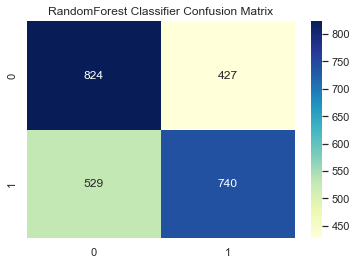

In [39]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm3, annot = True, fmt=  'd', cmap = 'YlGnBu')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

In [40]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      1251
           1       0.63      0.58      0.61      1269

    accuracy                           0.62      2520
   macro avg       0.62      0.62      0.62      2520
weighted avg       0.62      0.62      0.62      2520



# random forest hyperpatametr tuning

In [41]:
# hyperparameter tuning using gridserch for randomforst classifer
from sklearn.model_selection import GridSearchCV
rfgridcv=GridSearchCV(estimator=RandomForestClassifier(),
param_grid=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])
rfgridcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': [10, 50, 100],
                          'min_samples_split': [20, 100, 200],
                          'n_estimators': [5, 10, 50]}])

In [42]:
y_pred_rgcv=rfgridcv.predict(X_test)
# Calculating Accuracy of the model
rgcv= round(accuracy_score(y_test, y_pred_rgcv)*100,2)
print(rgcv)

63.41


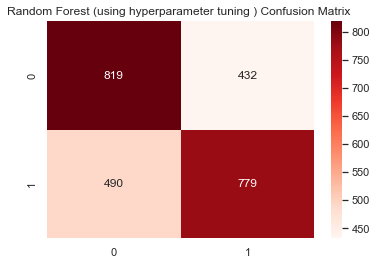

In [43]:
#confussion matrix for test data
cmm = confusion_matrix(y_test, y_pred_rgcv)
sns.heatmap(cmm, annot = True, fmt=  'd', cmap = 'Reds')
plt.title("Random Forest (using hyperparameter tuning ) Confusion Matrix ",fontsize=12)
plt.show()

## Perform Hyperparameter Tuning

In [44]:
# Again creating a random forest classifier
clf_rf2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                min_samples_split = 2, min_samples_leaf = 5, max_features = "auto",
                                random_state = 100, max_depth = 3) 

In [45]:
# Training the model 
clf_fit_2 = clf_rf2.fit(X_train, y_train) 

# Predicting the quality 
y_pred_2 = clf_fit_2.predict(X_test) 

In [46]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.6103174603174604

In [47]:
# #checking with sklearn cross validate
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_score
# model = RandomForestClassifier(n_estimators=1000, random_state=1, criterion='entropy', bootstrap=True, oob_score=True, verbose=1)
# cv_dict = cross_validate(model, X, y, return_train_score=True)
# cv_dict

## testing our model to future data and predicting for future data

# reading test data

In [77]:
#reading test data 
test_data = pd.read_csv("test_4zJg83n.csv")

In [78]:
#displaying
test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [79]:
#checking shape
test_data.shape

(3000, 9)

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         2908 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


# checking for null values

In [81]:
test_data.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [82]:
Null_values_percentage=(test_data.isnull().sum().sum()/len(test_data))*100
Null_values_percentage

3.0666666666666664

In [83]:
#computing null values of catogoric features with mode
test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)

In [84]:
test_data.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

# finding co-relation

In [85]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
test_data.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,8500.500000,36.111000,1.577000,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.494118,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000
max,10000.000000,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000


In [86]:
#checking co-realation of data
corelation=test_data.corr()
corelation

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
loan_id,1.000000,-0.014092,-0.014754,0.019097,-0.005795,-0.028111,-0.043389,-0.028631
age,-0.014092,1.000000,0.040835,-0.096555,-0.155379,0.207797,0.184371,0.065067
education,-0.014754,0.040835,1.000000,-0.044132,0.062528,0.011815,-0.008203,0.023779
loan_amount,0.019097,-0.096555,-0.044132,1.000000,0.755070,0.017017,0.000398,0.022136
asset_cost,-0.005795,-0.155379,0.062528,0.755070,1.000000,-0.053028,-0.066999,0.002588
no_of_loans,-0.028111,0.207797,0.011815,0.017017,-0.053028,1.000000,0.738552,0.203031
no_of_curr_loans,-0.043389,0.184371,-0.008203,0.000398,-0.066999,0.738552,1.000000,0.242590
last_delinq_none,-0.028631,0.065067,0.023779,0.022136,0.002588,0.203031,0.242590,1.000000


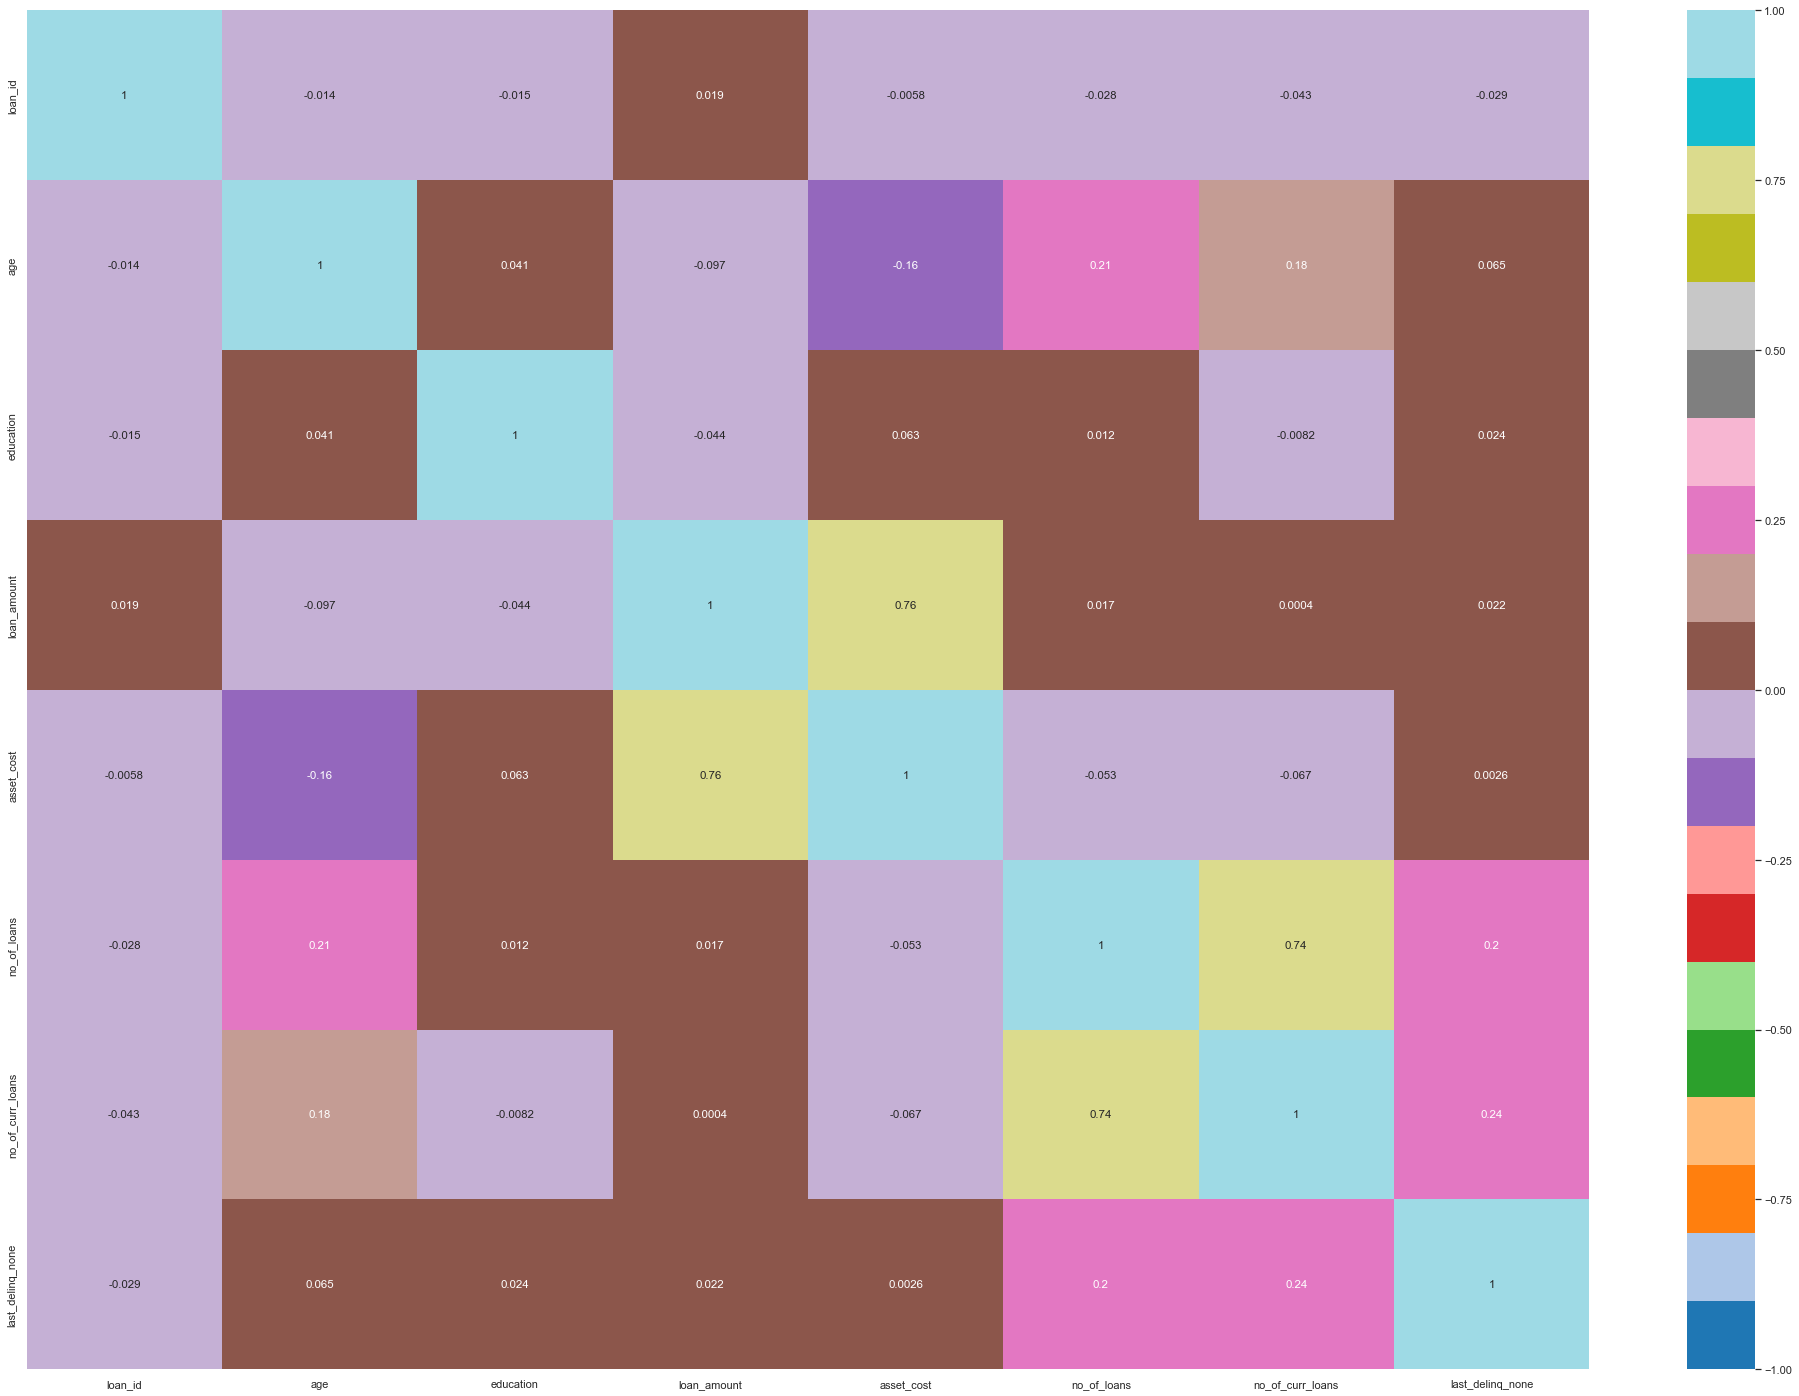

In [87]:
#ploting correlation
plt.figure(figsize = (35,25))
sns.heatmap(corelation, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'tab20', annot_kws = {"size": 11.5})
plt.show()

In [88]:
#saving loan id for display future prediction 
ID_prediction=test_data["loan_id"]
ID_prediction.head()

0    7001
1    7002
2    7003
3    7004
4    7005
Name: loan_id, dtype: int64

In [89]:
#removing Unnecessary column from data set 
test_data=test_data.drop(['loan_id'],axis=1)

In [90]:
#checking numeric features
numeric_fea = test_data.select_dtypes(include=np.number)
numeric_fea.columns

Index(['age', 'education', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')

In [91]:
#checking catagorical features
categoric = test_data.select_dtypes(include = object)
categoric.columns

Index(['proof_submitted'], dtype='object')

In [92]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encoded = pd.get_dummies(categoric, drop_first = True)

In [93]:
#joining the dummy encoded values and numeric values for future moddel building
test_data_dummy = pd.concat([numeric_fea, dummy_encoded], axis=1)
test_data_dummy.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,29,1.0,636936,768240,2,2,0,0,0,0,0
1,28,1.0,548988,693060,3,3,0,0,0,0,0
2,28,1.0,651756,936600,0,0,0,0,0,0,0
3,45,2.0,614676,744840,4,3,0,0,0,0,0
4,48,1.0,625236,839400,0,0,0,0,0,0,0


In [94]:
#checking shape
test_data_dummy.shape

(3000, 11)

In [95]:
#pridiction of globle sales for test data using random forest hypertuned model
loan_default_predictions = model_r_f1.predict(test_data_dummy)
loan_default_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [96]:
#creating the dataframe for predicted values
df = pd.DataFrame(loan_default_predictions)
df.rename({0:"loan_default"},inplace =True,axis=1)

In [97]:
# joining the predicted values with loan Id
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID_prediction.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,loan_id,loan_default
0,7001,0
1,7002,0
2,7003,1
3,7004,1
4,7005,0
...,...,...
2995,9996,0
2996,9997,0
2997,9998,0
2998,9999,0


In [98]:
#save the file into csv file
dataframe.to_csv("loan_default_predictions147.csv",index=False)